In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('DNN-EdgeIIoT-dataset.csv', low_memory=False)

print(df.head())
print(df.shape)

                  frame.time    ip.src_host    ip.dst_host arp.dst.proto_ipv4  \
0   2021 11:44:10.081753000   192.168.0.128  192.168.0.101                  0   
1   2021 11:44:10.162218000   192.168.0.101  192.168.0.128                  0   
2   2021 11:44:10.162271000   192.168.0.128  192.168.0.101                  0   
3   2021 11:44:10.162641000   192.168.0.128  192.168.0.101                  0   
4   2021 11:44:10.166132000   192.168.0.101  192.168.0.128                  0   

   arp.opcode  arp.hw.size arp.src.proto_ipv4  icmp.checksum  icmp.seq_le  \
0         0.0          0.0                  0            0.0          0.0   
1         0.0          0.0                  0            0.0          0.0   
2         0.0          0.0                  0            0.0          0.0   
3         0.0          0.0                  0            0.0          0.0   
4         0.0          0.0                  0            0.0          0.0   

   icmp.transmit_timestamp  ...  mqtt.proto_len mq

In [5]:
print(df['Attack_type'].value_counts())

Attack_type
Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: count, dtype: int64


In [6]:
from sklearn.utils import shuffle

drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

df.isna().sum()

print(df['Attack_type'].value_counts())

Attack_type
Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: count, dtype: int64


In [7]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

In [9]:
print(df.columns.tolist())

['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label', 'Attack_type', 'http.request.method-0', 'http.request.method-0.0', 'http.request.method-GET', 'http.request.method-OPTIONS', 'http.request.method-POST', 'http.request.method-PROPFIND', 'http.request.method-PUT', 'http.request.method-SEARCH', 'http.request.method-TRACE', 'http.referer-() { _; } >_[$($()

In [11]:
print(df[''])



829185     0
583624     0
1013865    0
1367416    0
154042     0
          ..
1502300    0
1645187    1
969157     0
1529376    0
1263400    0
Name: Attack_label, Length: 1909671, dtype: int64


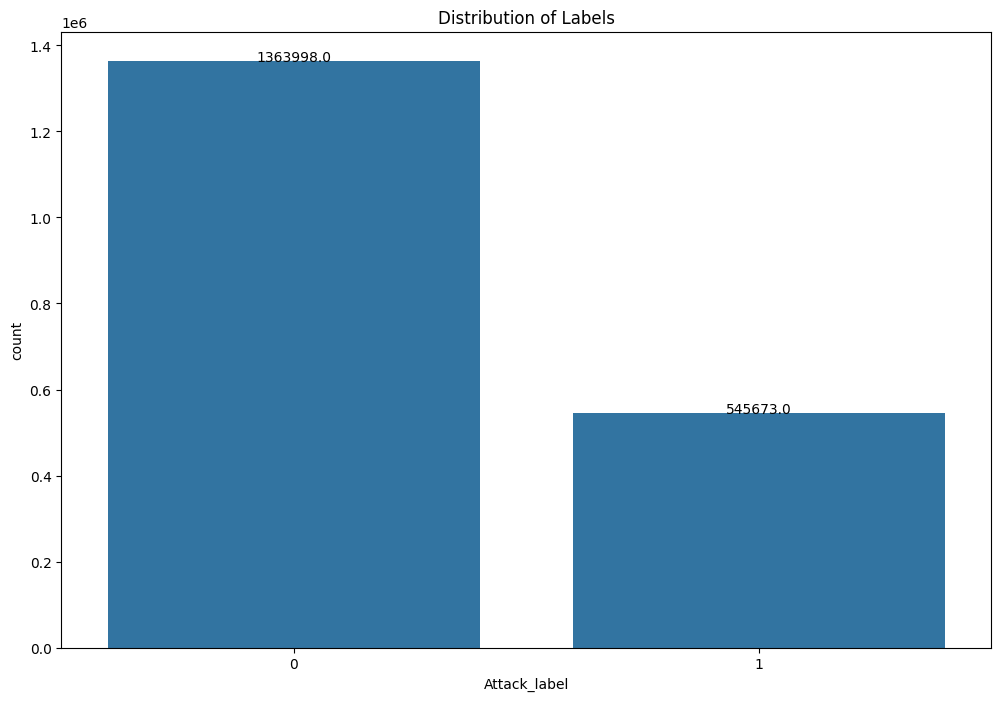

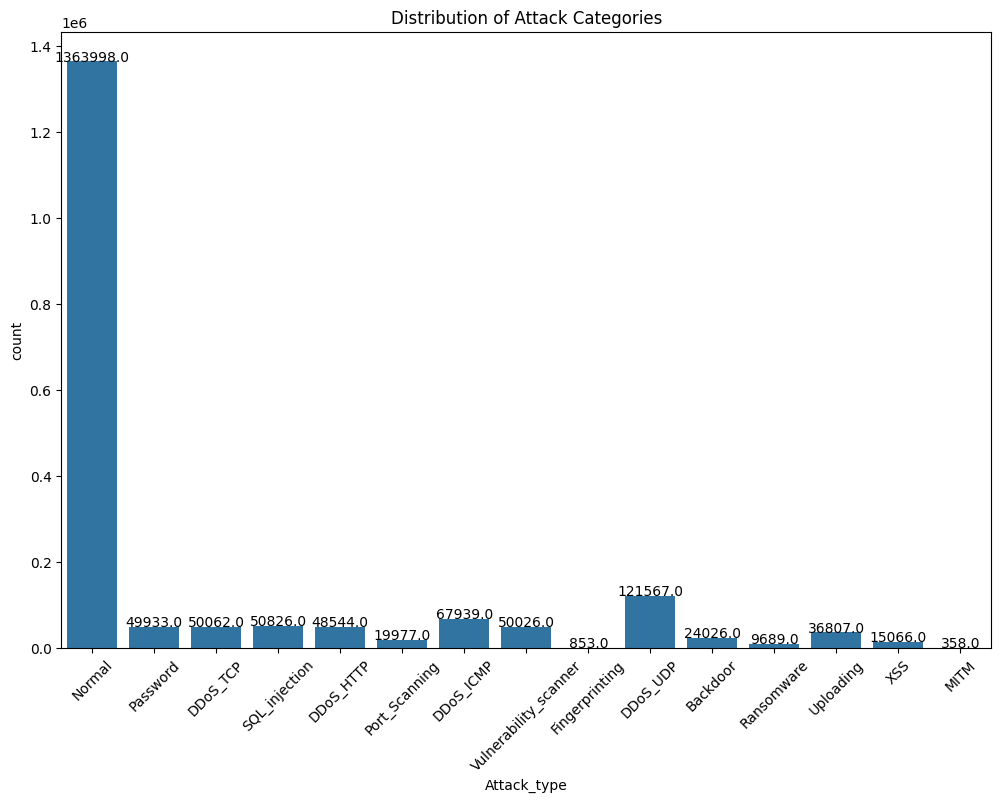

In [ ]:
column_names = df.columns.tolist()
df.columns = column_names

labels = df['Attack_label']
attack_category = df['Attack_type']

plt.figure(figsize=(12, 8))
sns.countplot(x=labels)
plt.title('Distribution of Labels')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x=attack_category)
plt.title('Distribution of Attack Categories')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

In [ ]:
from sklearn.utils import resample

df_majority = df[df['Attack_label'] == 0]
df_minority = df[df['Attack_label'] == 1]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,  
                                   n_samples=len(df_minority),  
                                   random_state=42)  

df_balanced = pd.concat([df_majority_downsampled, df_minority])

df_balanced = shuffle(df_balanced)

print(df_balanced['Attack_label'].value_counts())

Attack_label
0    545673
1    545673
Name: count, dtype: int64


In [ ]:
X = df_balanced.drop(columns=['Attack_label', 'Attack_type'])
y_label = df_balanced['Attack_label']
y_attack_cat = df_balanced['Attack_type']

X_train, X_test, y_label_train, y_label_test, y_attack_cat_train, y_attack_cat_test = train_test_split(
    X, y_label, y_attack_cat, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (873076, 95)
Testing set size: (218270, 95)


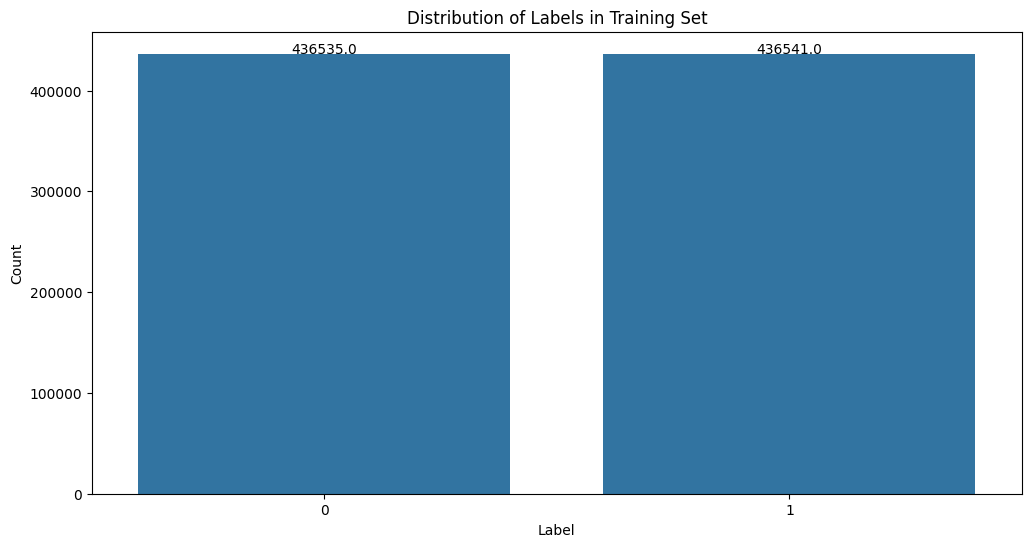

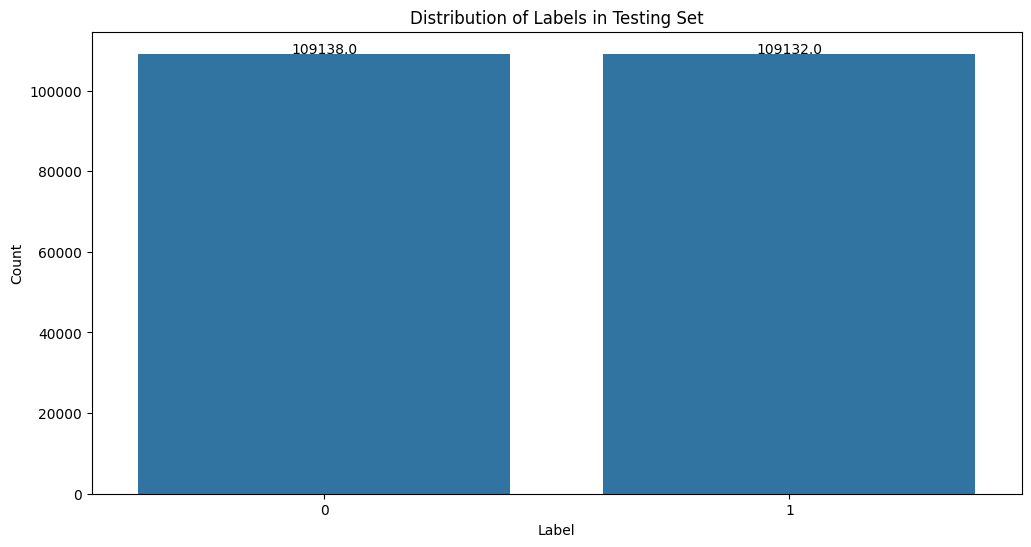

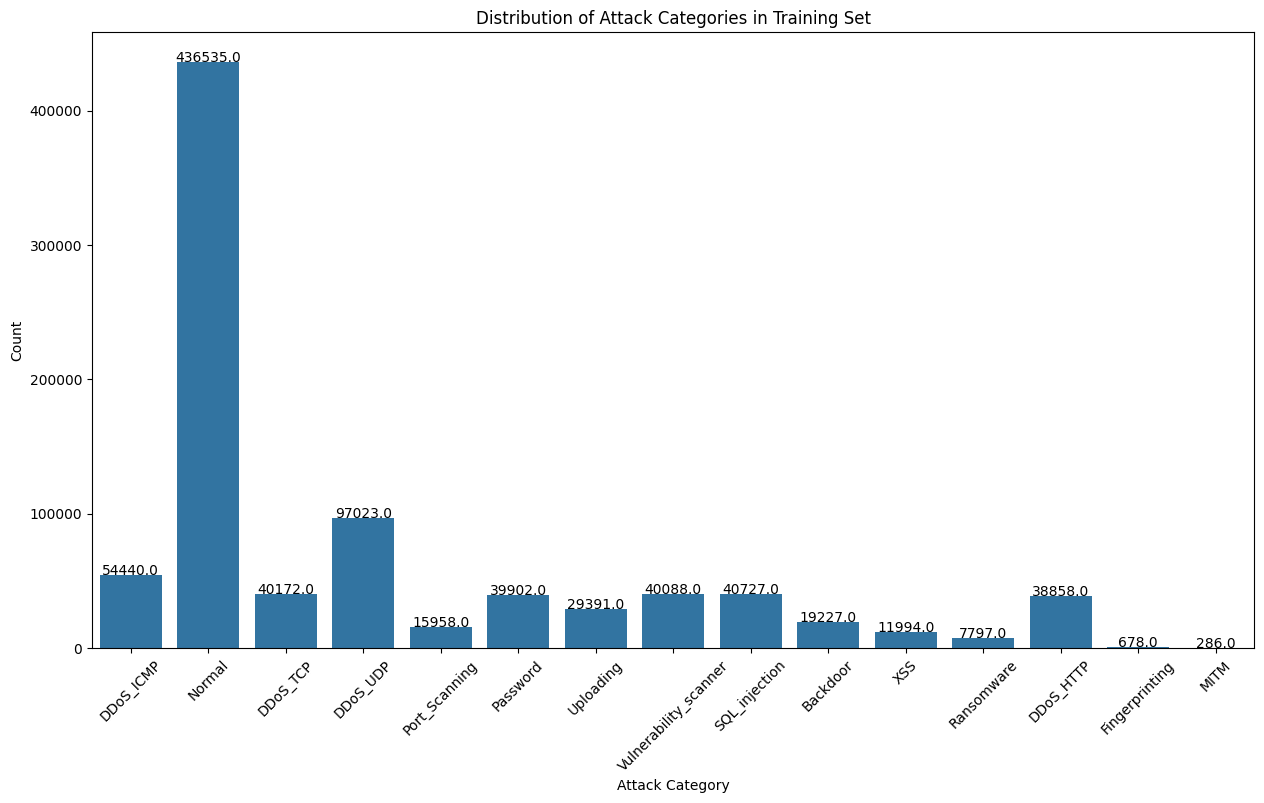

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'XSS'),
  Text(1, 0, 'DDoS_TCP'),
  Text(2, 0, 'Normal'),
  Text(3, 0, 'SQL_injection'),
  Text(4, 0, 'DDoS_HTTP'),
  Text(5, 0, 'DDoS_UDP'),
  Text(6, 0, 'DDoS_ICMP'),
  Text(7, 0, 'Password'),
  Text(8, 0, 'Uploading'),
  Text(9, 0, 'Ransomware'),
  Text(10, 0, 'Vulnerability_scanner'),
  Text(11, 0, 'Backdoor'),
  Text(12, 0, 'Port_Scanning'),
  Text(13, 0, 'Fingerprinting'),
  Text(14, 0, 'MITM')])

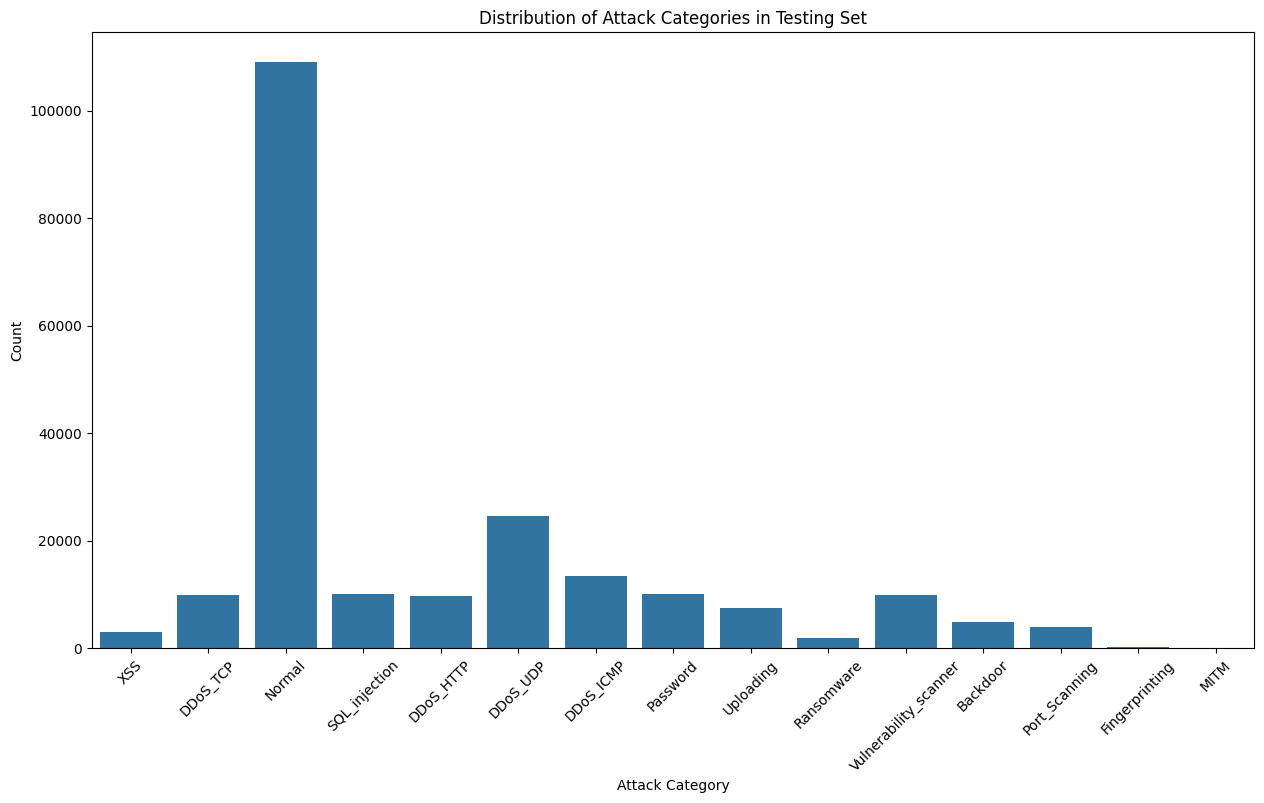

In [ ]:
# lables train
plt.figure(figsize=(12, 6))
sns.countplot(x=y_label_train)
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

# lables test
plt.figure(figsize=(12, 6))
sns.countplot(x=y_label_test)
plt.title('Distribution of Labels in Testing Set')
plt.xlabel('Label')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(x=y_attack_cat_train)
plt.title('Distribution of Attack Categories in Training Set')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(x=y_attack_cat_test)
plt.title('Distribution of Attack Categories in Testing Set')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)


In [22]:
# # Save the training datasets
# X_train.to_csv('./datasets/Edge_IIoT/X_train.csv', index=False)
# y_label_train.to_csv('./datasets/Edge_IIoT/y_label_train.csv', index=False)
# y_attack_cat_train.to_csv('./datasets/Edge_IIoT/y_attack_cat_train.csv', index=False)

# # Save the testing datasets
# X_test.to_csv('./datasets/Edge_IIoT/X_test.csv', index=False)
# y_label_test.to_csv('./datasets/Edge_IIoT/y_label_test.csv', index=False)
# y_attack_cat_test.to_csv('./datasets/Edge_IIoT/y_attack_cat_test.csv', index=False)